In [31]:
### Script is to visualize initial temperature and salinity results from    ###
### CREG025_LIM3-VFD003 run outputs, December 2022                          ###

import matplotlib.pyplot as plt
import numpy as np
from numpy import *
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
from cmocean import cm as cmo

AttributeError: 'GeoAxesSubplot' object has no attribute '_autoscaleXon'

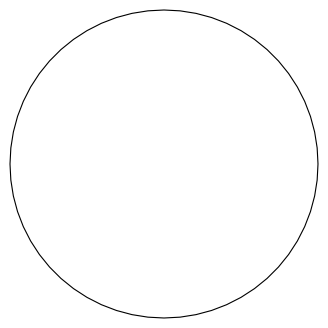

In [46]:
# Define figure dimensions and projection, works with matplotlib's built in transform support
fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1, 1, 1, projection = ccrs.Orthographic(0, 90)) # (0,90) for northern hemisphere, (180, -90) for southern

# Set extent to cover whole globe
ax.set_global()

# add standard background map
ax.stock_img()


In [32]:
# Adding data

five_d_grid_T = Dataset('/gpfs/fs7/dfo/hpcmc/pfm/fid000/RUN_DIR/Auto-restart/CREG025_LIM3/CREG025_LIM3-VFD003/CDF/CREG025_LIM3-VFD003_5d_grid_T_19931001-19931005.nc')

lat = five_d_grid_T.variables['nav_lat'][:]
lon = five_d_grid_T.variables['nav_lon'][:]
temp = five_d_grid_T.variables['temp'][0,0,:,:]
salinity = five_d_grid_T.variables['salt'][0,0,:,:]


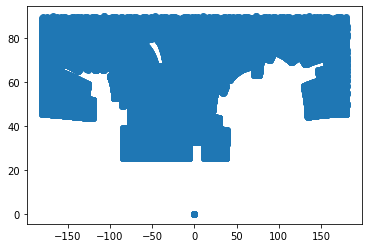

In [10]:
fig = plt.scatter(x=lon, y=lat)


In [5]:
five_d_grid_T

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: CREG025_LIM3-VFD003_5d_grid_T
    description: Created by xios
    title: Created by xios
    Conventions: CF-1.6
    timeStamp: 2022-Nov-04 15:30:04 GMT
    uuid: 34835f3b-0736-426b-91c9-3e131adbbed9
    history: Fri Nov  4 15:34:11 2022: ncks -4 -L 4 -O CREG025_LIM3-VFD003_5d_grid_T_19931001-19931005.nc CREG025_LIM3-VFD003_5d_grid_T_19931001-19931005.nc.z
    NCO: 4.7.2
    dimensions(sizes): deptht(75), axis_nbounds(2), y(735), x(528), time_counter(1)
    variables(dimensions): float32 deptht(deptht), float32 deptht_bounds(deptht, axis_nbounds), float32 nav_lat(y, x), float32 nav_lon(y, x), float32 salt(time_counter, deptht, y, x), float32 temp(time_counter, deptht, y, x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter, axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter, axis_nbounds)
    groups: 

In [21]:
# Convert lon values from 180 -180 to 0-360

lon1 = np.mod(lon, 360)

AttributeError: 'GeoAxesSubplot' object has no attribute '_autoscaleXon'

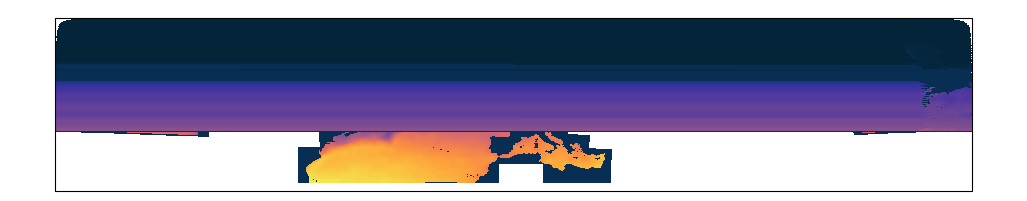

In [45]:
plt.figure(figsize=(13,6.2))
    
ax = plt.subplot(111, projection=ccrs.PlateCarree())

mm = ax.pcolormesh(long_coords,
                   lat_coords,
                   #five_day_grid_T.squeeze(),
                   temp,
                   vmin=-2,
                   vmax=30,
                   transform=ccrs.PlateCarree(),
                   cmap=cmo.thermal)
ax.coastlines();

In [38]:
# Using the coordinates from this file: coordinates_CREG025_LIM.nc
coords = Dataset('/gpfs/fs7/dfo/hpcmc/pfm/fid000/ANALYSIS/DATA/coordinates_CREG025_LIM.nc')

coords

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): x(528), y(735)
    variables(dimensions): float32 nav_lon(y, x), float32 nav_lat(y, x), float64 glamt(y, x), float64 glamu(y, x), float64 glamv(y, x), float64 glamf(y, x), float64 gphit(y, x), float64 gphiu(y, x), float64 gphiv(y, x), float64 gphif(y, x), float64 e1t(y, x), float64 e1u(y, x), float64 e1v(y, x), float64 e1f(y, x), float64 e2t(y, x), float64 e2u(y, x), float64 e2v(y, x), float64 e2f(y, x)
    groups: 

In [42]:
# Define new lat and long values from coords file

lat_coords = coords.variables['nav_lat'][:]
long_coords = coords.variables['nav_lon'][:]


In [22]:
x = sort(lon1)
x

masked_array(
  data=[[  0.     ,   0.     ,   0.     , ..., 353.50067, 353.75067,
         354.00067],
        [  0.     ,   0.     ,   0.     , ..., 353.5008 , 353.7508 ,
         354.0008 ],
        [  0.     ,   0.     ,   0.     , ..., 353.50092, 353.75095,
         354.00095],
        ...,
        [  0.     ,   0.     ,   0.     , ..., 239.45973, 239.70618,
         239.9526 ],
        [  0.     ,   0.     ,   0.     , ..., 239.45369, 239.70024,
         239.94678],
        [  0.     ,   0.     ,   0.     , ..., 239.44775, 239.69441,
         239.94106]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [18]:
print(np. min(lon))

-179.99701


AttributeError: 'GeoAxesSubplot' object has no attribute '_autoscaleXon'

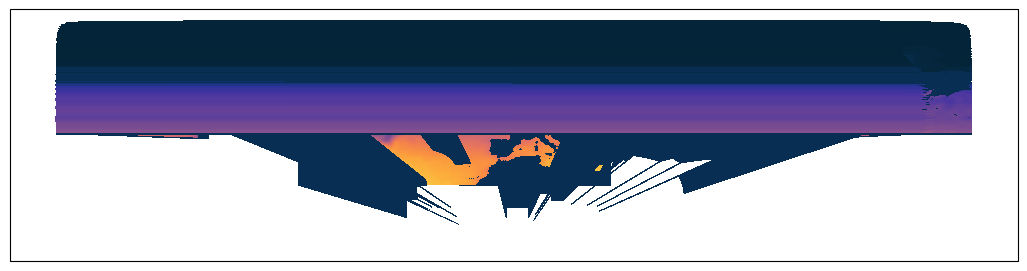

In [47]:
# This is where the kernal always dies in Spyder

fig = plt.figure(figsize=(13,6.2))
    
ax = plt.subplot(111, projection=ccrs.Orthographic(0, 90))

mm = ax.pcolormesh(lon,lat,temp, vmin=-2,vmax=30,
                   transform=ccrs.Orthographic(0, 90), 
                   cmap=cmo.thermal)

plt.axes((left, bottom, width, height), facecolor='grey')

ax.coastlines();


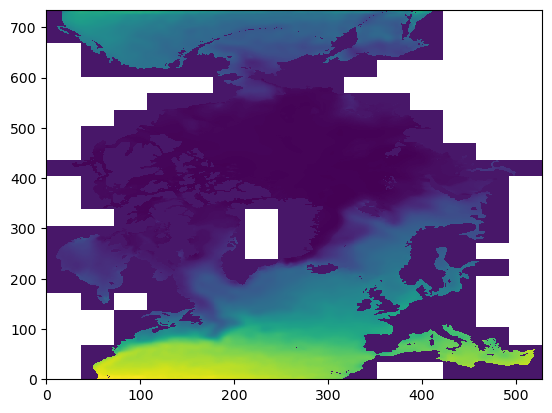

In [37]:
fig, ax = plt.subplots()
ax.pcolormesh(temp)

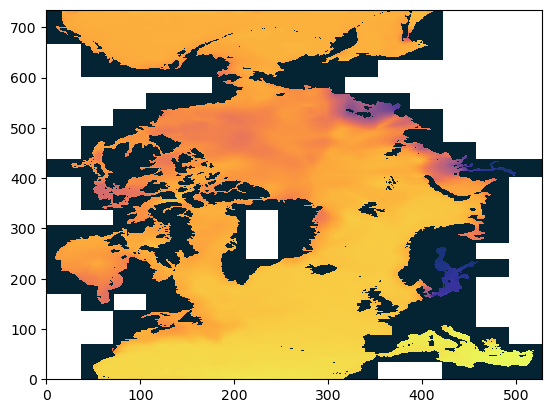

In [50]:
fig, ax = plt.subplots()
#fig, ax = plt.axes()
ax.pcolor(salinity, cmap=cmo.thermal)


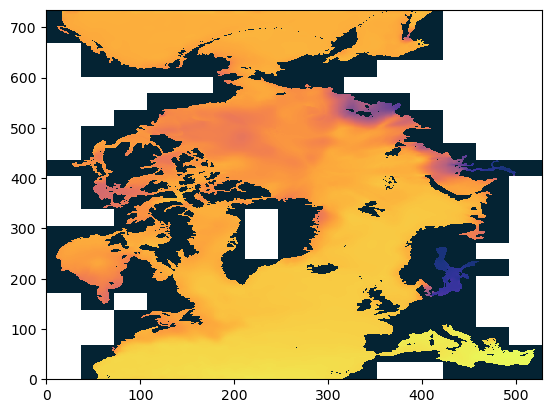

In [51]:
fig, ax = plt.subplots()
#fig, ax = plt.axes()
ax.pcolormesh(salinity, cmap=cmo.thermal)

In [9]:
plt.figure(figsize=(3, 3))
ax = plt.axes(projection=ccrs.Orthographic())
ax.coastlines(resolution='110m')
ax.gridlines()

Error in callback <function _draw_all_if_interactive at 0x7f6488d2fe50> (for post_execute):


AttributeError: 'GeoAxesSubplot' object has no attribute '_autoscaleXon'

AttributeError: 'GeoAxesSubplot' object has no attribute '_autoscaleXon'

<Figure size 300x300 with 1 Axes>

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(3, 3))
ax = plt.axes(projection=ccrs.Orthographic())
ax.coastlines(resolution='110m')
ax.gridlines()

Error in callback <function _draw_all_if_interactive at 0x7f6488d2fe50> (for post_execute):


AttributeError: 'GeoAxesSubplot' object has no attribute '_autoscaleXon'

AttributeError: 'GeoAxesSubplot' object has no attribute '_autoscaleXon'

<Figure size 300x300 with 1 Axes>